# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

# Who (Audience)
The audience determines the level of detail and type of story you tell. Possible audiences for this dataset could include:

E-commerce Category Managers – Need insights into which products and categories perform well and how discounts affect sales.
Marketing and Pricing Teams – Want to understand pricing strategies, discount effectiveness, and customer sentiment (ratings).
Product Development Teams – Interested in customer ratings and feedback to improve products.
Executives & Investors – Require high-level insights into revenue, category trends, and customer satisfaction.
Data Analysts & Scientists – Need granular data for trend analysis, predictive modeling, and recommendations.



---



# What (Key Message & Insight)
The dataset can support multiple stories, depending on the audience. Some possible insights include:

Price Sensitivity & Discount Effectiveness
Do discounts lead to higher ratings and more purchases?
Which categories benefit the most from price reductions?
Is there an optimal discount percentage that maximizes revenue?
Customer Satisfaction & Product Quality
How do ratings correlate with price and discounting?
Do certain categories consistently receive higher ratings?
What is the relationship between rating count and actual rating? (e.g., do more ratings mean higher trust?)
Category & Product Performance
Which product categories generate the highest revenue?
Are there underperforming products that need re-pricing, removal, or marketing push?
Do high-rated products also have strong sales, or are they niche?



---



# How (Visual Storytelling Approach)
The way insights are presented depends on the audience. Here are potential approaches:

Line or Bar Charts for Price vs. Sales
Show the impact of discounting on sales volume.
Compare revenue between discounted vs. non-discounted products.
Scatterplots for Ratings vs. Price
Identify whether high prices correlate with high ratings or if customers favor value-for-money products.
Heatmaps for Category-Level Insights
Show the concentration of high ratings across categories.
Highlight discount effectiveness by category.
Boxplots or Violin Plots for Price Distribution
Show price distribution across categories and compare with rating distribution.
Bubble Charts for Popularity vs. Sentiment
Use rating count as bubble size, product rating as x-axis, and discount amount as y-axis to show whether discounts drive high engagement.
Story-Driven Dashboards for Decision Makers
Combine KPIs (average discount %, top-rated categories, highest-selling products) in a clear, easy-to-digest format.

# 3. Homework - work with your own data

In [205]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [206]:
# Read amazon.csv data set return 6 rows of samples

import pandas as pd

def get_amazon_data_sample(file_path, num_rows=6):
    try:
        df = pd.read_csv(file_path)
        return df.sample(n=num_rows)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage (replace 'amazon.csv' with the actual file path)
sample_data = get_amazon_data_sample('amazon.csv')

if sample_data is not None:
  sample_data

sample_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
358,B08VFF6JQ8,Samsung 25W USB Travel Adapter for Cellular Ph...,Electronics|Mobiles&Accessories|MobileAccessor...,"₹1,219","₹1,699",28%,4.4,"8,891",Charging Cable Not Included. Compatible With A...,"AH6ATQVI2YBUXDHJEADXMVOBBT2Q,AHXO4AUAOUTAX3SLS...","Harsh Saxena,Rishi Kashyap,AJAY,Amazon custome...","R3GPDNKHUWXBMD,R2UV1Y16L96TQY,RI0NHWUS3HCNY,R2...","Fine,Difference between this and a 15W is not ...",Samsung offers super fast charging at 25 watt....,https://m.media-amazon.com/images/I/21uXmiH98w...,https://www.amazon.in/Samsung-25W-Travel-Adapt...
1291,B08MVXPTDG,Crompton Insta Delight Fan Circulator Room Hea...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,590","₹4,200",38%,4.1,63,Tapping into a natural phenomenon known as “co...,"AGYS2OMZE7DCEFQOBUJ7OSMPG3DQ,AF56UQ52OFSZL2KX2...","Kanwar Singh,mukesh bajpai,Deepak Kumar,sreeka...","R1KQ8JLFP0TG78,R1NBW7YR79U41D,R3J7GSQFAQVB31,R...","no,Good and reliable product 👍,Overall very fi...","no,There should be a fan speed control option....",https://m.media-amazon.com/images/I/31vL9-jaaJ...,https://www.amazon.in/Crompton-Delight-Circula...
645,B00MFPCY5C,GIZGA essentials Universal Silicone Keyboard P...,Computers&Accessories|Accessories&Peripherals|...,₹39,₹299,87%,3.5,"15,233",Universal Silicone Keyboard Protector Keyguard...,"AETHN2CGVNPVX5Y6SAWO6IO7QOEA,AFIZ6OD2C7QAISE7F...","Selva sibi,Apparao Yarra,priyanshu jha,Ashish ...","R3NB1CQXEVVQIT,R2I6VLGIXFKKU,R1G8SZJG03IY67,R2...","Good,Affordable and best,Check the size !,valu...","Value for money,Grt product,Please ensure the ...",https://m.media-amazon.com/images/I/51YPXDh78V...,https://www.amazon.in/Universal-Silicone-Keybo...
286,B0B7B9V9QP,VU 108 cm (43 inches) Premium Series Full HD S...,"Electronics|HomeTheater,TV&Video|Televisions|S...","₹18,999","₹35,000",46%,4.0,"1,001",Resolution : Full HD (1920x1080) | Refresh Rat...,"AHQCV7O3JOMFFMD7EGIZ2NGSU6JQ,AGTB6FEDSOBJNAVZS...","Logaraj m,KIRAN KUMAR GUDLA,Sandeep Kumar,Jayd...","R22OHRDXFQ2O98,RSAB4HSG5ZH9H,R3FC8NLEZ4DJ8N,R1...","Vu brand superb quality,Value for price,Thik h...","Super,Good Quality , value for money.. in time...",https://m.media-amazon.com/images/I/51eyIMn02b...,https://www.amazon.in/VU-inches-Premium-Smart-...
1155,B07WJXCTG9,Pigeon by Stovekraft Amaze Plus Electric Kettl...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹699,"₹1,345",48%,3.9,"8,446",CLASSIC DESIGN : The classical mirror polish o...,"AHGFUWNO5JO5V5DUDHKMWTLNP5HA,AE5M7SPRDYEU6EPXV...","R.Ravinder,Tejinder,Santosh dixit,Raju Prasad,...","R2US7Y06YM7OHR,R2OAKOAGTGVUTN,R3DVFQGVFX84XI,R...","Useful,Not value for money,कीमत के हिसाब से बे...","Useful,Takes long time to heat up water , not ...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Pigeon-stovekraft-Amaze-...


## **Summarize the datasets using info() and describe()**

In [207]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
amazon_df = pd.read_csv('amazon.csv')

# Now you can use the info() and describe() methods on the DataFrame object
amazon_df.info()
amazon_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


### Are there any duplicate rows? *No duplicate rows.*

In [208]:
duplicate_rows = amazon_df[amazon_df.duplicated()]
duplicate_rows

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


### What are the mean, median, and mode of each column?

### Provided mean, median and mode for numerical data categories: *'Disounted Price' and 'Actual price'*

In [209]:
# prompt: what is the mean median and mode of columns with numerical data in amazon df

import pandas as pd

# Load the CSV file
file_path = 'amazon.csv'
data = pd.read_csv(file_path)

# Convert 'actual_price' and 'discounted_price' to numeric, handling potential errors
def to_numeric(x):
    try:
        # Attempt to convert to numeric, removing commas and currency symbols if present
        return pd.to_numeric(x.str.replace(',', '').str.replace('₹', ''))  # Assuming Indian Rupees
    except AttributeError:
        # If already numeric, return as is
        return x

data['actual_price'] = to_numeric(data['actual_price'])
data['discounted_price'] = to_numeric(data['discounted_price'])

# Calculate mean, median, and mode for numerical columns
numerical_cols = ['actual_price', 'discounted_price']
for col in numerical_cols:
    mean_val = data[col].mean()
    median_val = data[col].median()
    mode_val = data[col].mode().iloc[0]  # Get the first mode value
    print(f"Column: {col}")
    print(f"  Mean: {mean_val}")
    print(f"  Median: {median_val}")
    print(f"  Mode: {mode_val}")
    print("-" * 20)


Column: actual_price
  Mean: 5444.990634812287
  Median: 1650.0
  Mode: 999.0
--------------------
Column: discounted_price
  Mean: 3125.3108737201364
  Median: 799.0
  Mode: 199.0
--------------------


### Are there any missing or null values? The column named'rating_count' has (2)

In [210]:
# Are there any missing or null values?

import pandas as pd

# Load the CSV file
file_path = 'amazon.csv'
try:
    amazon_df = pd.read_csv(file_path)

    # Check for missing values
    missing_values = amazon_df.isnull().sum()
    print("Missing values per column:\n", missing_values)

    # Check for null values
    null_values = amazon_df.isna().sum()
    print("\nNull values per column:\n", null_values)

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Missing values per column:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Null values per column:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [212]:

import pandas as pd

# Load the CSV file
file_path = 'amazon.csv'
try:
    amazon_df = pd.read_csv(file_path)

    # Identify inconsistent data types
    for col in amazon_df.columns:
        print(f"Column: {col}, Unique data types: {amazon_df[col].apply(type).unique()}")

    # Example: Check for inconsistent 'actual_price' and 'discounted_price' formats
    # (e.g. some values with currency symbols, commas, etc.)
    print("\nSample 'actual_price' values:")
    print(amazon_df['actual_price'].head(10))
    print("\nSample 'discounted_price' values:")
    print(amazon_df['discounted_price'].head(10))


    #Further analysis can be done based on the output. For example, if 'actual_price'
    #has inconsistent formats, you might need to clean it using regex or other string manipulation techniques

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Column: product_id, Unique data types: [<class 'str'>]
Column: product_name, Unique data types: [<class 'str'>]
Column: category, Unique data types: [<class 'str'>]
Column: discounted_price, Unique data types: [<class 'str'>]
Column: actual_price, Unique data types: [<class 'str'>]
Column: discount_percentage, Unique data types: [<class 'str'>]
Column: rating, Unique data types: [<class 'str'>]
Column: rating_count, Unique data types: [<class 'str'> <class 'float'>]
Column: about_product, Unique data types: [<class 'str'>]
Column: user_id, Unique data types: [<class 'str'>]
Column: user_name, Unique data types: [<class 'str'>]
Column: review_id, Unique data types: [<class 'str'>]
Column: review_title, Unique data types: [<class 'str'>]
Column: review_content, Unique data types: [<class 'str'>]
Column: img_link, Unique data types: [<class 'str'>]
Column: product_link, Unique data types: [<class 'str'>]

Sample 'actual_price' values:
0    ₹1,099
1      ₹349
2    ₹1,899
3      ₹699
4     

In [214]:
# Check for inconsistent data in 'rating_count' column

inconsistent_rows = amazon_df[pd.to_numeric(amazon_df['rating_count'], errors='coerce').isna()]
inconsistent_rows

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,B00TI8E7BI,Philips HD9306/06 1.5-Litre Electric Kettle (M...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,695","₹2,695",0%,4.4,"2,518","Food grade stainless steel, Frequency: 50 Hz. ...","AHYXOMUJUKZHBWHP43ZAB265EDGA,AG4C27NTZZ7HTG6W3...","AmazonCust,DD_Zen,Amazon Customer,VINISH THOMA...","R252H4TFMWK9L7,R3SAFGRVGD7GTV,R1FVCFYT4SGY76,R...","3,Sturdy and Works Flawlessly,Excellent 👍,Real...","Cord is small and sound while heating,Well bui...",https://m.media-amazon.com/images/I/41JyZuDzDg...,https://www.amazon.in/Philips-HD9306-06-1-5-Li...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product wi

In [215]:
# Replace 'actual_price' and 'discounted_price' with '$' values
data['actual_price_usd'] = '$' + data['actual_price_usd'].astype(str)
data['discounted_price_usd'] = '$' + data['discounted_price_usd'].astype(str)

# Save the modified DataFrame to a new CSV file
data.to_csv('amazon_modified.csv', index=False)


In [216]:
import pandas as pd

# Load the CSV file
file_path = 'amazon.csv'
data = pd.read_csv(file_path)

# Convert 'actual_price' and 'discounted_price' to numeric, handling potential errors
def to_numeric(x):
    try:
        # Attempt to convert to numeric, removing commas and currency symbols if present
        return pd.to_numeric(x.str.replace(',', '').str.replace('₹', ''))  # Assuming Indian Rupees
    except AttributeError:
        # If already numeric, return as is
        return x

data['actual_price'] = to_numeric(data['actual_price'])
data['discounted_price'] = to_numeric(data['discounted_price'])

# The currency conversion
currency_conversion_rate = 0.012  # Example: 1 INR = 0.012 USD
data['actual_price_usd'] = data['actual_price'] * currency_conversion_rate
data['discounted_price_usd'] = data['discounted_price'] * currency_conversion_rate

# Round 'actual_price_usd' and 'discounted_price_usd' to 2 decimal places
data['actual_price_usd'] = data['actual_price_usd'].round(2)
data['discounted_price_usd'] = data['discounted_price_usd'].round(2)

# Replace 'actual_price' and 'discounted_price' with '$' values
data['actual_price_usd'] = '$' + data['actual_price_usd'].astype(str)
data['discounted_price_usd'] = '$' + data['discounted_price_usd'].astype(str)

# Save the modified DataFrame to a new CSV file
data.to_csv('amazon_modified.csv', index=False)

In [217]:
# Encode categorical variables with one-hot encoding.

import pandas as pd

# Load the modified DataFrame
amazon_df = pd.read_csv('amazon_modified.csv')  # Load the modified data

# Perform one-hot encoding on the 'category' column
amazon_encoded_df = pd.get_dummies(amazon_df, columns=['category'], prefix='category') # Assign to a new variable

# Display the updated DataFrame (optional)
print(amazon_encoded_df.head())  # Print the updated DataFrame

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

   discounted_price  actual_price discount_percentage rating rating_count  \
0             399.0        1099.0                 64%    4.2       24,269   
1             199.0         349.0                 43%    4.0       43,994   
2             199.0        1899.0                 90%    3.9        7,928   
3             329.0         699.0                 53%    4.2       94,363   
4             154.0         399.0                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible wi

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

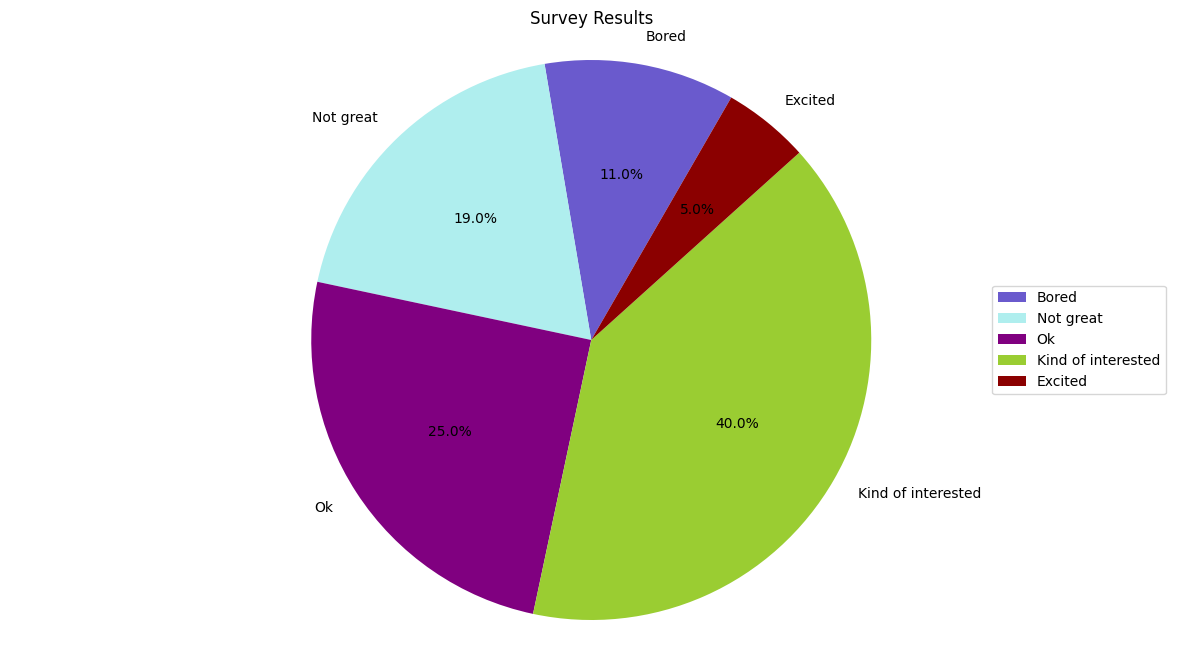

In [ ]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Bored', 'Not great', 'Ok', 'Kind of interested', 'Excited']
sizes = [11, 19, 25, 40, 5]

# Create the pie chart
plt.figure(figsize=(15, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60, colors=['slateblue', 'paleturquoise', 'purple', 'yellowgreen', 'darkred'])
plt.axis('equal')


# Create the legend
plt.legend(loc='center right')
#plt.legend(legendsize=4,8) #this line is incorrect

plt.title('Survey Results')
plt.show()

